# Training Insititue Student Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\MY PC\Desktop\Train.csv')
test = pd.read_csv(r'C:\Users\MY PC\Desktop\Test.csv')
train.head()

,id,program_id,program_type,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,13695_33,T_2,T,117,33,offline,intermediate,13695,F,Matriculation,2,43.0,2,N,1.0,1
1,873_139,Y_2,Y,120,139,offline,hard,873,M,Matriculation,2,NaN,2,N,3.0,1
2,6987_73,V_4,V,122,73,online,easy,6987,M,Matriculation,1,NaN,2,N,3.0,1
3,3380_100,V_1,V,133,100,offline,vary hard,3380,F,High School Diploma,3,30.0,2,Y,1.0,0
4,1906_114,Y_4,Y,121,114,offline,intermediate,1906,M,High School Diploma,3,NaN,2,N,5.0,1


In [3]:
train.shape

(51202, 16)

In [4]:
test.shape

(21945, 15)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51202 entries, 0 to 51201
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         51202 non-null  object 
 1   program_id                 51202 non-null  object 
 2   program_type               51202 non-null  object 
 3   program_duration           51202 non-null  int64  
 4   test_id                    51202 non-null  int64  
 5   test_type                  51202 non-null  object 
 6   difficulty_level           51202 non-null  object 
 7   trainee_id                 51202 non-null  int64  
 8   gender                     51202 non-null  object 
 9   education                  51202 non-null  object 
 10  city_tier                  51202 non-null  int64  
 11  age                        31857 non-null  float64
 12  total_programs_enrolled    51202 non-null  int64  
 13  is_handicapped             51202 non-null  obj

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21945 entries, 0 to 21944
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         21945 non-null  object 
 1   program_id                 21945 non-null  object 
 2   program_type               21945 non-null  object 
 3   program_duration           21945 non-null  int64  
 4   test_id                    21945 non-null  int64  
 5   test_type                  21945 non-null  object 
 6   difficulty_level           21945 non-null  object 
 7   trainee_id                 21945 non-null  int64  
 8   gender                     21945 non-null  object 
 9   education                  21945 non-null  object 
 10  city_tier                  21945 non-null  int64  
 11  age                        13561 non-null  float64
 12  total_programs_enrolled    21945 non-null  int64  
 13  is_handicapped             21945 non-null  obj

## Dropping the Variables:
- id
- program_id
- test_id
- trainee_id

These variables would not have much impact on the model.

In [7]:
train = train.drop(["id" , "program_id" , "test_id" , "trainee_id"] , axis = 1)
train.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,T,117,offline,intermediate,F,Matriculation,2,43.0,2,N,1.0,1
1,Y,120,offline,hard,M,Matriculation,2,NaN,2,N,3.0,1
2,V,122,online,easy,M,Matriculation,1,NaN,2,N,3.0,1
3,V,133,offline,vary hard,F,High School Diploma,3,30.0,2,Y,1.0,0
4,Y,121,offline,intermediate,M,High School Diploma,3,NaN,2,N,5.0,1


In [8]:
test = test.drop(["id" , "program_id" , "test_id" , "trainee_id"] , axis = 1)
test.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating
0,Y,136,offline,intermediate,M,Matriculation,1,42.0,2,Y,3.0
1,T,134,offline,intermediate,F,Matriculation,3,25.0,2,Y,1.0
2,V,131,offline,intermediate,F,High School Diploma,3,24.0,3,N,1.0
3,V,131,offline,intermediate,M,Matriculation,3,NaN,4,N,3.0
4,Y,136,online,easy,M,High School Diploma,1,45.0,3,N,4.0


## Missing Value Treatment

In [9]:
train.isnull().sum()

program_type                     0
program_duration                 0
test_type                        0
difficulty_level                 0
gender                           0
education                        0
city_tier                        0
age                          19345
total_programs_enrolled          0
is_handicapped                   0
trainee_engagement_rating       51
is_pass                          0
dtype: int64

In [10]:
test.isnull().sum()

program_type                    0
program_duration                0
test_type                       0
difficulty_level                0
gender                          0
education                       0
city_tier                       0
age                          8384
total_programs_enrolled         0
is_handicapped                  0
trainee_engagement_rating      26
dtype: int64

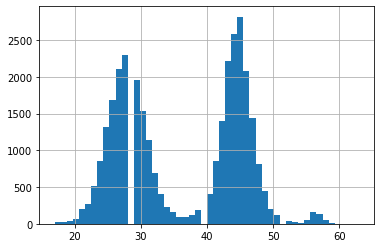

In [11]:
train.age.hist(bins=50)

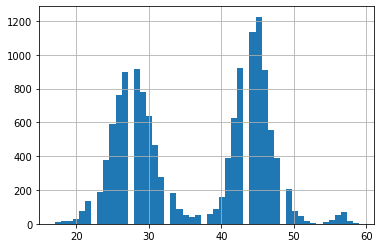

In [12]:
test.age.hist(bins=50)

### Direct imputation for age column would not give true insights hence creating groups to impute for age of each category

In [13]:
train.groupby(["program_type" ,"gender" , "education"])['age'].mean()

program_type  gender  education          
S             F       Bachelors              41.087719
                      High School Diploma    37.694581
                      Matriculation          40.726027
              M       Bachelors              42.035461
                      High School Diploma    37.509615
                                               ...    
Z             F       No Qualification       29.780488
              M       Bachelors              41.421053
                      High School Diploma    35.934132
                      Matriculation          37.332344
                      No Qualification       27.000000
Name: age, Length: 65, dtype: float64

In [14]:
train["age"] = train["age"].fillna(train.groupby(["program_type" ,"gender" , "education"])['age'].transform('mean'))

In [15]:
test["age"] = test["age"].fillna(test.groupby(["program_type" , "gender" , "education"])['age'].transform('mean'))

In [16]:
print(train["age"].isnull().sum())
print(test["age"].isnull().sum())

0
0


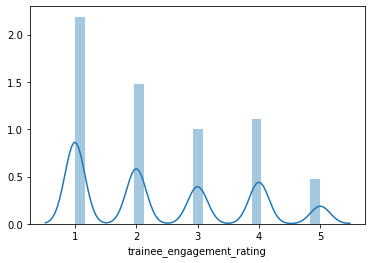

In [17]:
sns.distplot(train.trainee_engagement_rating)

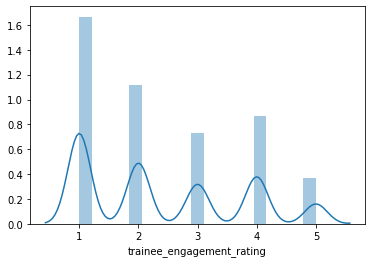

In [18]:
sns.distplot(test.trainee_engagement_rating)

In [19]:
### Filling missing values with mean for trainee_engagement_rating

train["trainee_engagement_rating"] = train["trainee_engagement_rating"].fillna(train["trainee_engagement_rating"].mean())
train["trainee_engagement_rating"].isnull().sum()

0

In [20]:
### Filling missing values with mean for trainee_engagement_rating

test["trainee_engagement_rating"] = test["trainee_engagement_rating"].fillna(test["trainee_engagement_rating"].mean())
test["trainee_engagement_rating"].isnull().sum()

0

In [21]:
x = train.drop(["is_pass"],axis=1)
y = train["is_pass"]

# EDA

In [22]:
num_columns = list(train._get_numeric_data().columns)
all_columns = list(train.columns)

In [23]:
num_columns

['program_duration',
 'city_tier',
 'age',
 'total_programs_enrolled',
 'trainee_engagement_rating',
 'is_pass']

In [24]:
cat_columns = []
for i in all_columns:
    if i not in num_columns:
        cat_columns.append(i)
cat_columns

['program_type',
 'test_type',
 'difficulty_level',
 'gender',
 'education',
 'is_handicapped']

### CATAGORICAL FEATURES

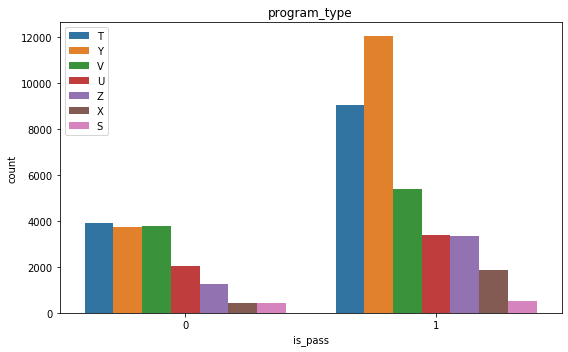

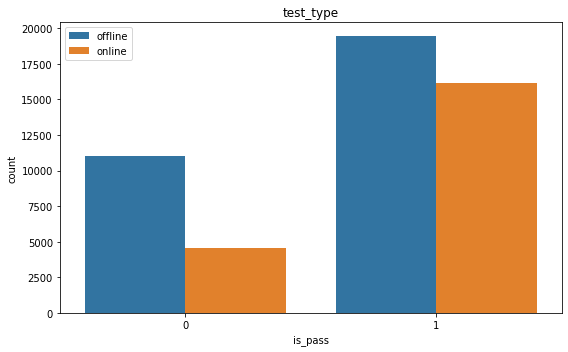

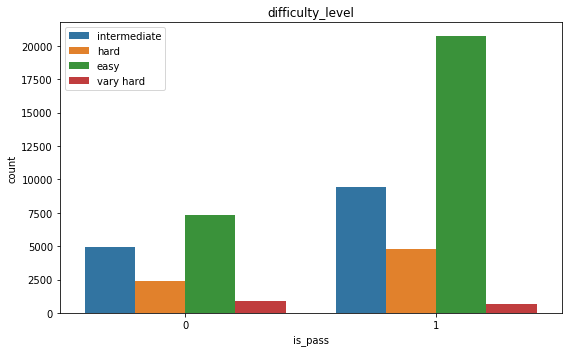

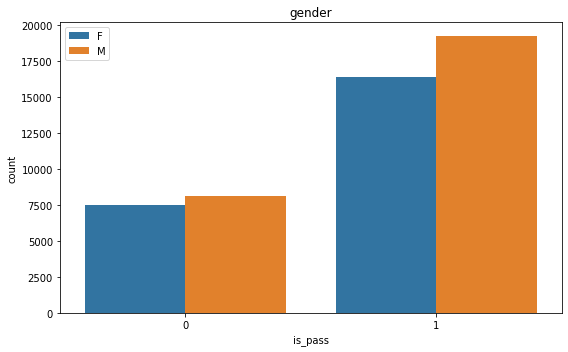

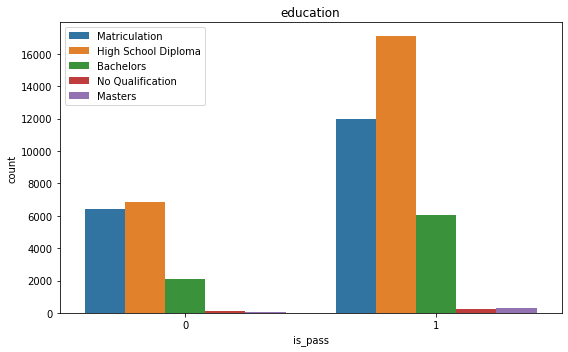

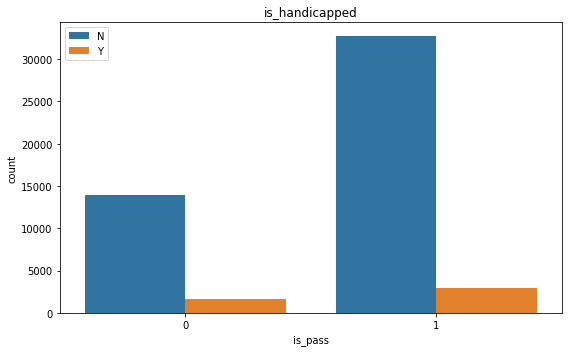

In [25]:
for i in cat_columns:
    plt.figure(figsize=(8,5))
    sns.countplot(train["is_pass"],hue=train[i])
    plt.legend(loc=2)
    plt.title(i)
    plt.tight_layout()
    plt.show()

### Analyzed Results

1. Y-program type generates most pass outcomes and T-program type generates most failed outcomes.
2. In case of offline test type,pass ratio is more when compared to online test type.
3. Pass ratio is more when difficulty level is 'easy'.
4. More male trainees have passed in comparison with females.
5. High-school diploma trainees have passed in more number.
6. Non-handicapped trainees have passed in more number.

### NUMERICAL FEATURES

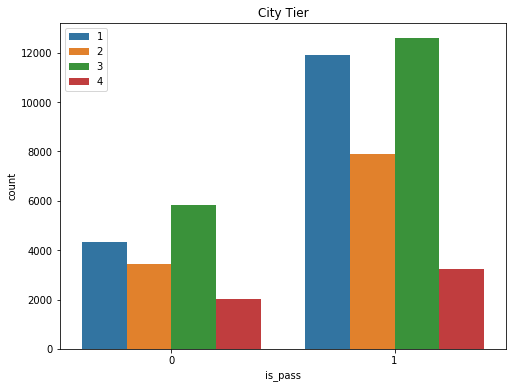

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(train['is_pass'],hue=train['city_tier'])
plt.legend(loc=2)
plt.title("City Tier")
plt.show()

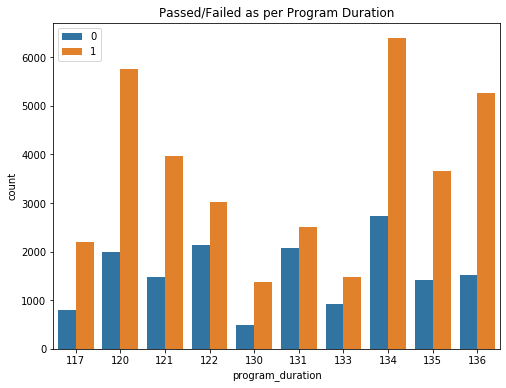

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(train['program_duration'],hue=train['is_pass'])
plt.legend(loc=2)
plt.title("Passed/Failed as per Program Duration")
plt.show()

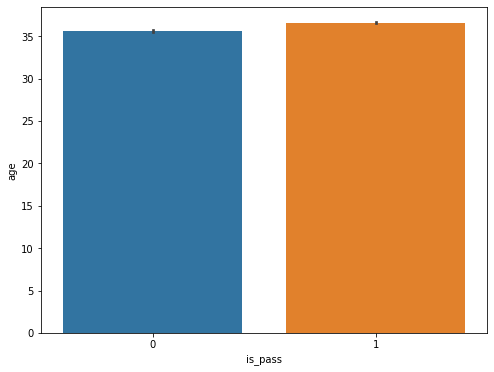

In [28]:
plt.figure(figsize=(8,6))
sns.barplot(train["is_pass"],train["age"])
plt.show()

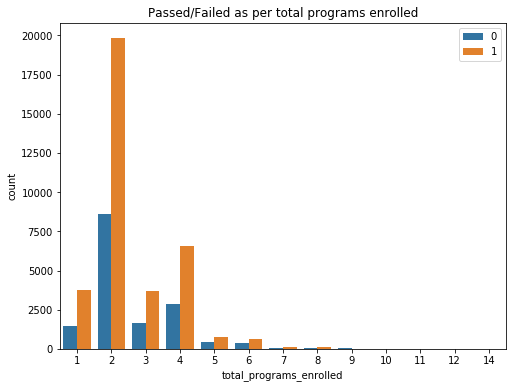

In [29]:
plt.figure(figsize=(8,6))
sns.countplot(train['total_programs_enrolled'],hue=train['is_pass'])
plt.legend(loc=1)
plt.title("Passed/Failed as per total programs enrolled")
plt.show()

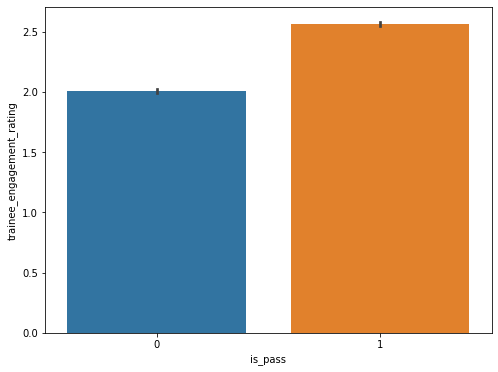

In [30]:
plt.figure(figsize=(8,6))
sns.barplot(train["is_pass"],train["trainee_engagement_rating"])
plt.show()

### Analyzed Results

1. For a 134 days Program duration followed by a 120 days program duration pass ration is high.
2. More trainees from tier-3 city have passed.
3. Trainees with 35+ age have passed in more number.
4. Trainees who have enrolled in 2 programs have passed in more number followed by trainees with 4-programs enrollment.
5. An average trainee engagement rating of more than 2 have resulted in more number of passed trainees. 

# DATA PRE-PROCESSING

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [32]:
train_cat = train[cat_columns]
train_num = train[num_columns]

In [33]:
train_cat_encoded = train_cat.apply(lb.fit_transform)
train_cat_encoded.head()

,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,1,0,2,0,3,0
1,5,0,1,1,3,0
2,3,1,0,1,3,0
3,3,0,3,0,1,1
4,5,0,2,1,1,0


In [34]:
Train = train_num.join(train_cat_encoded)
Train.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,is_pass,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,117,2,43.000000,2,1.0,1,1,0,2,0,3,0
1,120,2,35.718915,2,3.0,1,5,0,1,1,3,0
2,122,1,35.252582,2,3.0,1,3,1,0,1,3,0
3,133,3,30.000000,2,1.0,0,3,0,3,0,1,1
4,121,3,34.835922,2,5.0,1,5,0,2,1,1,0


### Pre-processing the Test dataset

In [35]:
test_num = list(test._get_numeric_data().columns)
test_all = list(test.columns)
test_cat = []
for i in test_all:
    if i not in test_num:
        test_cat.append(i)
test_cat

['program_type',
 'test_type',
 'difficulty_level',
 'gender',
 'education',
 'is_handicapped']

In [36]:
testnum = test[test_num]
testcat = test[test_cat]
testcat_encoded = testcat.apply(lb.fit_transform)
testcat_encoded.head()

,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,5,0,2,1,3,1
1,1,0,2,0,3,1
2,3,0,2,0,1,0
3,3,0,2,1,3,0
4,5,1,0,1,1,0


In [37]:
Test = testnum.join(testcat_encoded)
Test.head()

,program_duration,city_tier,age,total_programs_enrolled,trainee_engagement_rating,program_type,test_type,difficulty_level,gender,education,is_handicapped
0,136,1,42.000000,2,3.0,5,0,2,1,3,1
1,134,3,25.000000,2,1.0,1,0,2,0,3,1
2,131,3,24.000000,3,1.0,3,0,2,0,1,0
3,131,3,35.093137,4,3.0,3,0,2,1,3,0
4,136,1,45.000000,3,4.0,5,1,0,1,1,0


# MULTICOLLINEARITY CHECK

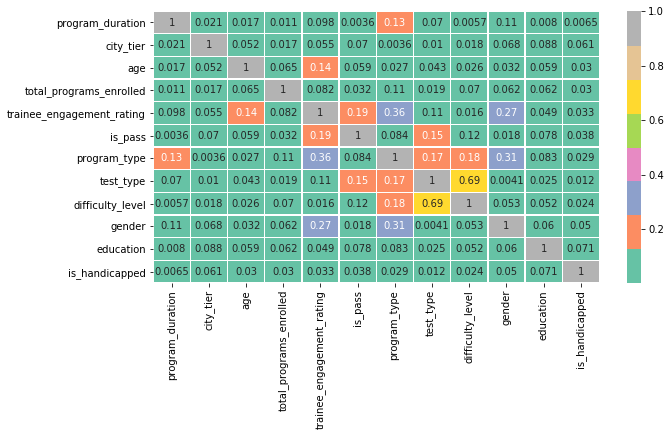

In [38]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(Train.corr()),annot=True,linewidths=0.3,cmap="Set2")
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_data = Train.drop(["is_pass"],axis=1)
Y_data = Train["is_pass"]

In [40]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_stand = sc.fit_transform(X_data)

In [41]:
vif = pd.DataFrame()
vif["Index"] = X_data.keys()
vif["Score"] = [variance_inflation_factor(x_stand,i) for i in range(len(X_data.keys()))]
vif.set_index(["Index"] , inplace = True)
vif

,Score
Index,
program_duration,1.037691
city_tier,1.019019
age,1.044623
total_programs_enrolled,1.053201
trainee_engagement_rating,1.263161
program_type,1.338183
test_type,1.960466
difficulty_level,1.968982
gender,1.180357


#### As we can see from the above heatmap and VIF dataframe,multicollinearity is not encountered.

# RESAMPLING

In [42]:
Y_data.value_counts()

1    35606
0    15596
Name: is_pass, dtype: int64

##### We can see that the data is imbalanced. Hence, resampling with replacement has been opted.

In [43]:
from sklearn.utils import resample
data_majority = Train[Train["is_pass"] == 1]
data_minority = Train[Train["is_pass"] == 0]

In [44]:
data_minority_resampled = resample(data_minority , n_samples = 35606 , replace = True , random_state = 42)

In [45]:
df = pd.concat([data_majority , data_minority_resampled])

In [46]:
X = df.drop(["is_pass"],axis=1)
Y = df["is_pass"]

In [47]:
Y.value_counts()

1    35606
0    35606
Name: is_pass, dtype: int64

##### As we can see, the dataset is balanced now.

# MODEL BUILDING

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score , GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score , roc_curve , classification_report , average_precision_score

### Logistic Regression 

In [49]:
lr = LogisticRegression()
lr.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
Y_predict = lr.predict(X)

In [51]:
fpr , tpr , thresolds = roc_curve(Y,lr.predict_proba(X)[:,1])

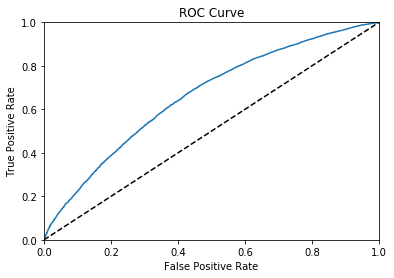

In [52]:
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC Curve")
plt.show()

In [53]:
print("The ROC_AUC score of training data is {:.2f}".format(roc_auc_score(Y,Y_predict)*100),"%")

The ROC_AUC score of training data is 61.86 %


In [54]:
print("The average cross-validation score is {:.2f}".format(cross_val_score(lr,X,Y,cv=10).mean()*100))

The average cross-validation score is 61.85


In [55]:
print('The classification report is as follows:\n',classification_report(Y,Y_predict))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.61      0.64      0.63     35606
           1       0.62      0.60      0.61     35606

    accuracy                           0.62     71212
   macro avg       0.62      0.62      0.62     71212
weighted avg       0.62      0.62      0.62     71212



In [57]:
print("The average precision score of training data is {:.2f}".format(average_precision_score(Y,Y_predict)*100),"%")

The average precision score of training data is 57.41 %


### Random Forest Classifier

In [56]:
rfc = RandomForestClassifier(n_estimators=100,max_leaf_nodes=40,max_depth=5,random_state=42)
rfc.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=40, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [57]:
Y_predict1 = rfc.predict(X)

In [58]:
print("The ROC_AUC score of training data is {:.2f}".format(roc_auc_score(Y,Y_predict1)*100),"%")

The ROC_AUC score of training data is 64.55 %


In [59]:
print("The average cross-validation score is {:.2f}".format(cross_val_score(rfc,X,Y,cv=10).mean()*100))

The average cross-validation score is 64.54


In [60]:
print('The classification report is as follows:\n',classification_report(Y,Y_predict1))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65     35606
           1       0.65      0.64      0.64     35606

    accuracy                           0.65     71212
   macro avg       0.65      0.65      0.65     71212
weighted avg       0.65      0.65      0.65     71212



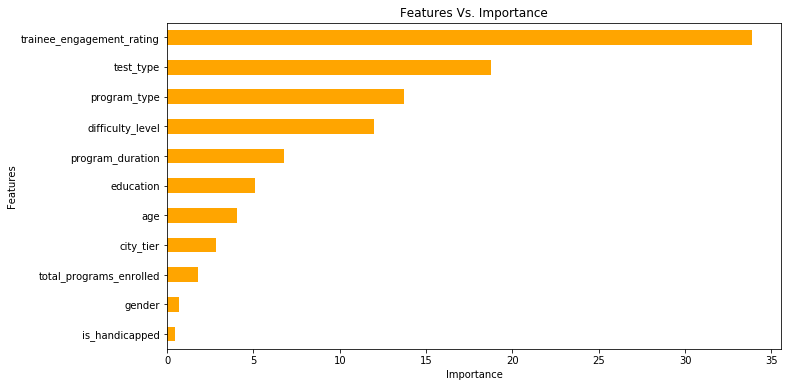

In [61]:
data_frame = pd.DataFrame()
data_frame['importance'] = rfc.feature_importances_ * 100
data_frame['features'] = X.columns
data_frame.set_index('features' , inplace = True)
data_frame.sort_values(by = ["importance"] , ascending = True , inplace = True)
data_frame.importance.plot(kind = 'barh' , figsize = (11,6) , color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Features Vs. Importance')
plt.show()

### Selecting Top Features only for analysis

In [62]:
X_new = df.drop(["total_programs_enrolled","age","gender","is_handicapped","is_pass"],axis=1)

In [63]:
grid = {'n_estimators':np.array([100,200,300,500,1000]),'max_leaf_nodes':np.array([40,60,80,100])}

In [64]:
rfc1 = RandomForestClassifier(max_depth=5,random_state=42)

In [65]:
rfc11 = GridSearchCV(rfc1, grid, cv = 5)

In [ ]:
rfc11.fit(X_new,Y)

In [69]:
Y_predict_new = rfc11.predict(X_new)

In [70]:
print("Tuned hyperparameter : {}".format(rfc11.best_params_))

Tuned hyperparameter : {'max_leaf_nodes': 40, 'n_estimators': 1000}


In [71]:
##Using above best parametres

rfc111 = RandomForestClassifier(n_estimators =1000 ,max_leaf_nodes =40 ,max_depth=5,random_state=42)
rfc111.fit(X_new,Y)
Y_predict_new1 = rfc111.predict(X_new)

In [72]:
print("The ROC_AUC score of training data is {:.2f}".format(roc_auc_score(Y,Y_predict_new1)*100),"%")

The ROC_AUC score of training data is 65.02 %


In [73]:
print('The classification report is as follows:\n',classification_report(Y,Y_predict_new1))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65     35606
           1       0.65      0.65      0.65     35606

    accuracy                           0.65     71212
   macro avg       0.65      0.65      0.65     71212
weighted avg       0.65      0.65      0.65     71212



### RFE-based Variables for  Random Forest Classifier

In [74]:
rfe = RFE(rfc , 7)
rfe.fit(X , Y)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=5, max_features='auto',
                                     max_leaf_nodes=40, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=None,
                                     oob_score=False, random_state=42,
                                     verbose=0, warm_start=False),
    n_features_to_select=7, step=1, verbose=0)

In [75]:
new_columns = X.columns[rfe.support_]
new_columns

Index(['program_duration', 'age', 'trainee_engagement_rating', 'program_type',
       'test_type', 'difficulty_level', 'education'],
      dtype='object')

In [76]:
rfc11.fit(X[new_columns],Y)
Y_predict2 = rfc11.predict(X[new_columns])

In [77]:
print("Tuned hyperparameter : {}".format(rfc11.best_params_))

Tuned hyperparameter : {'max_leaf_nodes': 40, 'n_estimators': 1000}


In [79]:
##Using above best parametres

rfc111 = RandomForestClassifier(n_estimators =1000 ,max_leaf_nodes =40 ,max_depth=5,random_state=42)
rfc111.fit(X[new_columns],Y)
Y_predict2_new = rfc111.predict(X[new_columns])

In [80]:
print("The ROC_AUC score is {:.2f}".format(roc_auc_score(Y,Y_predict2_new)*100),"%")

The ROC_AUC score is 64.72 %


In [81]:
print('The classification report is as follows:\n',classification_report(Y,Y_predict2_new))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.65      0.64      0.65     35606
           1       0.65      0.65      0.65     35606

    accuracy                           0.65     71212
   macro avg       0.65      0.65      0.65     71212
weighted avg       0.65      0.65      0.65     71212



## Kneighbors Classifier

In [82]:
grid1 = {'n_neighbors': np.array([5,10,15,20]) , 'p' : np.array([3,6,9,12])}
knn = KNeighborsClassifier(metric='minkowski')
knn1 = GridSearchCV(knn, grid1, cv = 5)
knn1.fit(X,Y)
y_predict_knn = knn1.predict(X)

In [83]:
print("Tuned hyperparameter : {}".format(knn1.best_params_))

Tuned hyperparameter : {'n_neighbors': 5, 'p': 6}


In [58]:
## USING THE ABOVE COMPUTED HYPER-PARAMETRE

knn0 = KNeighborsClassifier(n_neighbors = 5 , p = 6 , metric='minkowski')
knn0.fit(X,Y)
y_predict_knn_new = knn0.predict(X)

In [59]:
print("The roc_auc score of the model is {:.2f}".format(roc_auc_score(Y , y_predict_knn_new) * 100) , "%")

The roc_auc score of the model is 81.01 %


In [60]:
print('The classification report is as follows:\n',classification_report(Y , y_predict_knn_new))

The classification report is as follows:
               precision    recall  f1-score   support

           0       0.78      0.87      0.82     35606
           1       0.85      0.75      0.80     35606

    accuracy                           0.81     71212
   macro avg       0.81      0.81      0.81     71212
weighted avg       0.81      0.81      0.81     71212



# Test Data Prediction

In [51]:
y_test_predict = knn0.predict(Test)
test['is_pass'] = y_test_predict
test.head()

,program_type,program_duration,test_type,difficulty_level,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,Y,136,offline,intermediate,M,Matriculation,1,42.000000,2,Y,3.0,0
1,T,134,offline,intermediate,F,Matriculation,3,25.000000,2,Y,1.0,0
2,V,131,offline,intermediate,F,High School Diploma,3,24.000000,3,N,1.0,0
3,V,131,offline,intermediate,M,Matriculation,3,35.093137,4,N,3.0,0
4,Y,136,online,easy,M,High School Diploma,1,45.000000,3,N,4.0,1


### Saving the prediction file

In [89]:
test.to_csv("Final test data.csv",index=False )

# CONCLUSION

In [90]:
print("The ROC_AUC score with Logistic regression is {:.2f}".format(roc_auc_score(Y,Y_predict)*100),"%")
print()
print("The ROC_AUC score with Random forest classifier is {:.2f}".format(roc_auc_score(Y,Y_predict1)*100),"%")
print()
print("The ROC_AUC score with only selecting best features with random forest classifier is {:.2f}".format(roc_auc_score(Y,Y_predict_new1)*100),"%")
print()
print("The ROC_AUC score with RFE-variables with Random forest classifier is {:.2f}".format(roc_auc_score(Y,Y_predict2_new)*100),"%")
print()
print("The ROC_AUC score with KNeighbors classifier is {:.2f}".format(roc_auc_score(Y , y_predict_knn_new) * 100) , "%")

The ROC_AUC score with Logistic regression is 61.86 %

The ROC_AUC score with Random forest classifier is 64.55 %

The ROC_AUC score with only selecting best features with random forest classifier is 65.02 %

The ROC_AUC score with RFE-variables with Random forest classifier is 64.72 %

The ROC_AUC score with KNeighbors classifier is 81.01 %


#### As we observed from the entire analysis that "KNN" performed best on the dataset,so,"KNN" have been finally selected for test data prediction.